In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [7]:
df=pd.read_csv("diabetes.csv")

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [10]:
ss=StandardScaler()
x = ss.fit_transform(x)

In [13]:
x.shape[1]

8

In [12]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Dense(2, activation="relu",input_shape=(x.shape[1],)),
                            tf.keras.layers.Dense(3, activation="relu"),
                            tf.keras.layers.Dense(1, activation="sigmoid")]
                           )

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [19]:
trained_model = model.fit(x_train, y_train, epochs=50, batch_size=50)

Epoch 1/50
11/11 [==============================] - 1s 799us/step - loss: 1.0585
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9285
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8698
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8494
Epoch 5/50
11/11 [==============================] - 0s 800us/step - loss: 0.8068
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7929
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7669
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7674
Epoch 9/50
11/11 [==============================] - 0s 799us/step - loss: 0.7446
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7700
Epoch 11/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7347
Epoch 12/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7443
Epoch 13/50
11/11 [========================

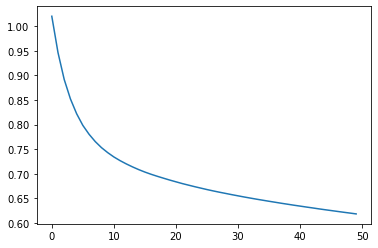

In [20]:
plt.plot(trained_model.history['loss'])
plt.show()

In [21]:
y_hat = model.predict(x_test)

In [22]:
y_hat

array([[0.4241799 ],
       [0.45988527],
       [0.2993986 ],
       [0.42947233],
       [0.45988527],
       [0.45988527],
       [0.45645726],
       [0.24880001],
       [0.25102407],
       [0.45988527],
       [0.31837046],
       [0.4568506 ],
       [0.45988527],
       [0.31209302],
       [0.42734456],
       [0.30262434],
       [0.45988527],
       [0.44010437],
       [0.31718668],
       [0.45988527],
       [0.39341098],
       [0.45988527],
       [0.36192405],
       [0.441496  ],
       [0.35199168],
       [0.45988527],
       [0.39599267],
       [0.09485984],
       [0.37915385],
       [0.45988527],
       [0.29280373],
       [0.45988527],
       [0.45988527],
       [0.37021506],
       [0.28697222],
       [0.36144423],
       [0.45988527],
       [0.45988527],
       [0.2757948 ],
       [0.45988527],
       [0.3224061 ],
       [0.44260547],
       [0.45988527],
       [0.37063718],
       [0.22150865],
       [0.45988527],
       [0.32229608],
       [0.406

In [23]:
y_hat1 = np.where(y_hat >= 0.5, 1, 0) #where value is o.5 than greater then shows 1 else 0

In [24]:
y_hat1.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
roc_auc_score(y_test, y_hat1)

0.5